<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_4_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%95%99%EC%8A%B5_%EA%B8%B0%EC%88%A0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seq(seqs, dim= 10000):
  results = np.zeros((len(seqs), dim))
  for i , seq in enumerate(seqs):
    results[i, seq] = 1.

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_1 =Sequential([Dense(16, activation = 'relu', input_shape = (10000,), name = 'input'),
                     Dense(16, activation = 'relu', name = 'hidden'),
                     Dense(1, activation = 'sigmoid', name = 'output')])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2 =Sequential([Dense(7, activation = 'relu', input_shape = (10000,), name = 'input2'),
                     Dense(7, activation = 'relu', name = 'hidden2'),
                     Dense(1, activation = 'sigmoid', name = 'output2')])


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 7)                 70007     
                                                                 
 hidden2 (Dense)             (None, 7)                 56        
                                                                 
 output2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])
model_2.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])


#### 2개의 모델 학습

In [ ]:
model_1_hist = model_1.fit(x_train,y_train, epochs = 20, batch_size = 512, validation_data = (x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.4385 - acc: 0.8157 - val_loss: 0.3558 - val_acc: 0.8592
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2509 - acc: 0.9114 - val_loss: 0.2825 - val_acc: 0.8897
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1933 - acc: 0.9293 - val_loss: 0.3644 - val_acc: 0.8525
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1640 - acc: 0.9408 - val_loss: 0.2997 - val_acc: 0.8823
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1404 - acc: 0.9505 - val_loss: 0.3278 - val_acc: 0.8759
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1215 - acc: 0.9586 - val_loss: 0.3418 - val_acc: 0.8742
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1082 - acc: 0.9622 - val_loss: 0.3787 - val_acc: 0.8680
Epoch 8/20
49/49 [==============================] - 2s 48ms/step - loss: 0.0964 - a

In [ ]:
model_2_hist = model_2.fit(x_train,y_train, epochs = 20, batch_size = 512, validation_data = (x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 73ms/step - loss: 0.5232 - acc: 0.8040 - val_loss: 0.4133 - val_acc: 0.8676
Epoch 2/20
49/49 [==============================] - 2s 48ms/step - loss: 0.3278 - acc: 0.8985 - val_loss: 0.3223 - val_acc: 0.8859
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2475 - acc: 0.9186 - val_loss: 0.2876 - val_acc: 0.8910
Epoch 4/20
49/49 [==============================] - 3s 51ms/step - loss: 0.2047 - acc: 0.9312 - val_loss: 0.2785 - val_acc: 0.8914
Epoch 5/20
49/49 [==============================] - 3s 56ms/step - loss: 0.1770 - acc: 0.9401 - val_loss: 0.2826 - val_acc: 0.8866
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.1563 - acc: 0.9476 - val_loss: 0.2889 - val_acc: 0.8858
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1393 - acc: 0.9534 - val_loss: 0.2997 - val_acc: 0.8826
Epoch 8/20
49/49 [==============================] - 2s 44ms/step - loss: 0.1250 - a

#### 비교

In [ ]:
epochs = range(1,21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

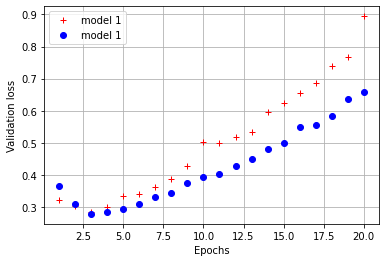

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'model 1')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.grid()
plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [ ]:
model_3 =Sequential([Dense(1024, activation = 'relu', input_shape = (10000,), name = 'input3'),
                     Dense(1024, activation = 'relu', name = 'hidden3'),
                     Dense(1, activation = 'sigmoid', name = 'output3')])

model_3.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [ ]:
model_3_hist = model_3.fit(x_train,y_train, epochs = 20, batch_size = 512, validation_data = (x_test,y_test))

Epoch 1/20
49/49 [==============================] - 34s 674ms/step - loss: 0.5122 - acc: 0.8164 - val_loss: 0.4546 - val_acc: 0.8103
Epoch 2/20
49/49 [==============================] - 32s 665ms/step - loss: 0.2212 - acc: 0.9116 - val_loss: 0.2756 - val_acc: 0.8885
Epoch 3/20
49/49 [==============================] - 33s 685ms/step - loss: 0.1187 - acc: 0.9570 - val_loss: 0.5887 - val_acc: 0.8176
Epoch 4/20
49/49 [==============================] - 32s 661ms/step - loss: 0.0816 - acc: 0.9816 - val_loss: 0.4273 - val_acc: 0.8864
Epoch 5/20
49/49 [==============================] - 32s 663ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.6689 - val_acc: 0.8778
Epoch 6/20
49/49 [==============================] - 34s 690ms/step - loss: 0.1680 - acc: 0.9867 - val_loss: 0.5497 - val_acc: 0.8844
Epoch 7/20
49/49 [==============================] - 32s 663ms/step - loss: 2.0651e-04 - acc: 1.0000 - val_loss: 0.7162 - val_acc: 0.8848
Epoch 8/20
49/49 [==============================] - 32s 666ms/ste

#### 시각화

In [ ]:
model_3_val_loss = model_3_hist.history['val_loss']

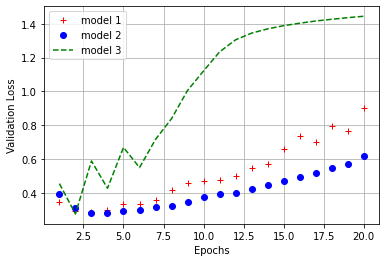

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+',label = 'model 1')
plt.plot(epochs, model_2_val_loss, 'bo',label = 'model 2')
plt.plot(epochs, model_3_val_loss, 'g--',label = 'model 3')


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

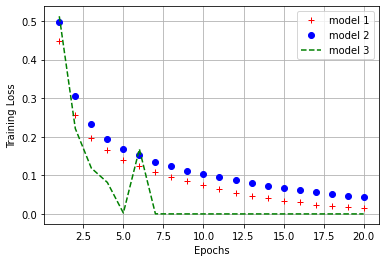

In [ ]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+',label = 'model 1')
plt.plot(epochs, model_2_train_loss, 'bo',label = 'model 2')
plt.plot(epochs, model_3_train_loss, 'g--',label = 'model 3')


plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential([Dense(30, kernel_initializer = 'he_normal', input_shape=[10,10]),
                   LeakyReLU(alpha = 0.20),
                   Dense(1, kernel_initializer = 'he_normal'),
                   Activation('softmax')])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_5 (Dense)             (None, 10, 1)             31        
                                                                 
 activation_1 (Activation)   (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [ ]:
optimizer = SGD(learning_rate = 0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [ ]:
optimizer = SGD(learning_rate = 0.001, momentum=0.9, nesterov = True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [ ]:
from tensorflow.keras.optimizers import Adagrad

In [ ]:
optimizer = Adagrad(learning_rate = 0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
optimizer = RMSprop(learning_rate = 0.001, rho =0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


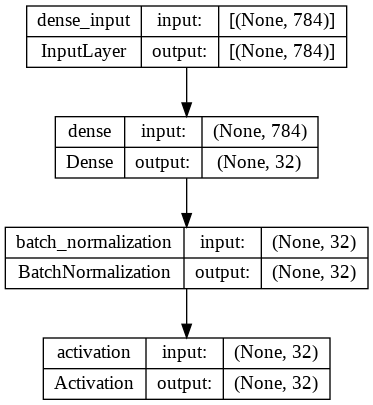

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape = (28*28,),kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes = True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2


    #### 모델 구성

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 80008     
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


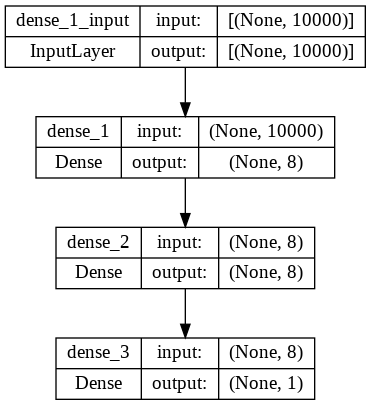

In [ ]:
l2_model = Sequential([Dense(8, kernel_regularizer = l2(0.001), activation = 'relu', input_shape=(10000, )),
                       Dense(8, kernel_regularizer = l2(0.001), activation = 'relu'),
                       Dense(1, activation = 'sigmoid')])
l2_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes = True)
                    

#### 모델 학습

In [ ]:
from traitlets.traitlets import validate
l2_model_hist = l2_model.fit(x_train, y_train, 
                             epochs =20,
                             batch_size = 512,
                             validation_data = (x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5832 - acc: 0.7430 - val_loss: 0.4960 - val_acc: 0.8686
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3957 - acc: 0.8926 - val_loss: 0.3646 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2992 - acc: 0.9146 - val_loss: 0.3351 - val_acc: 0.8830
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2585 - acc: 0.9244 - val_loss: 0.3284 - val_acc: 0.8832
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2382 - acc: 0.9308 - val_loss: 0.3201 - val_acc: 0.8879
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2250 - acc: 0.9366 - val_loss: 0.3250 - val_acc: 0.8856
Epoch 7/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2161 - acc: 0.9399 - val_loss: 0.3360 - val_acc: 0.8823
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2083 - a

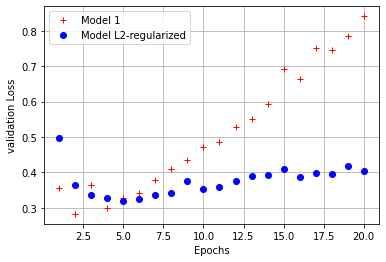

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label ='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label ='Model L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('validation Loss')
plt.legend()
plt.grid()
plt.show()


#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 80008     
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


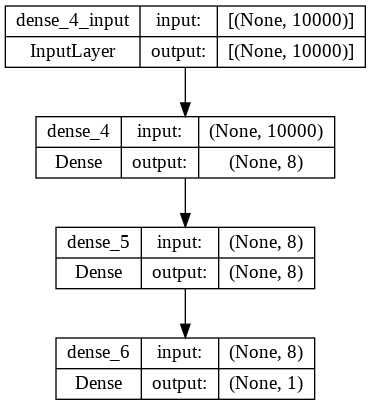

In [ ]:
l1_model = Sequential([Dense(8, kernel_regularizer = l1(0.0001), activation = 'relu', input_shape=(10000, )),
                       Dense(8, kernel_regularizer = l1(0.0001), activation = 'relu'),
                       Dense(1, activation = 'sigmoid')])
l1_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes = True)
                    

#### L1과 비교

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train, 
                             epochs =20,
                             batch_size = 512,
                             validation_data = (x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 56ms/step - loss: 0.5614 - acc: 0.8180 - val_loss: 0.4542 - val_acc: 0.8645
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3863 - acc: 0.8925 - val_loss: 0.3925 - val_acc: 0.8678
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3296 - acc: 0.9050 - val_loss: 0.3489 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3051 - acc: 0.9110 - val_loss: 0.3419 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2903 - acc: 0.9163 - val_loss: 0.3438 - val_acc: 0.8864
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2794 - acc: 0.9214 - val_loss: 0.3581 - val_acc: 0.8801
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2735 - acc: 0.9235 - val_loss: 0.3574 - val_acc: 0.8808
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2685 - a

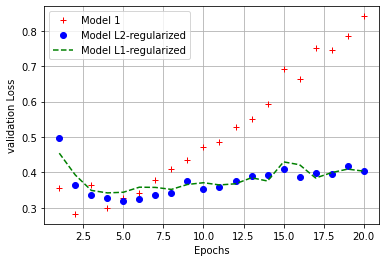

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label ='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label ='Model L2-regularized')
plt.plot(epochs, l1_model_val_loss, 'g--', label ='Model L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('validation Loss')
plt.legend()
plt.grid()
plt.show()


#### L1, L2와 비교

In [ ]:
l1_l2_model = Sequential([Dense(8, kernel_regularizer = l1_l2(l1=0.0001,l2= 0.0001), activation = 'relu', input_shape=(10000, )),
                         Dense(8, kernel_regularizer = l1_l2(l1=0.0001,l2= 0.0001), activation = 'relu'),
                         Dense(1, activation = 'sigmoid')])
l1_l2_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes = True)
                    

l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, 
                             epochs =20,
                             batch_size = 512,
                             validation_data = (x_test,y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 80008     
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
49/49 [==============================] - 8s 159ms/step - loss: 0.5541 - acc: 0.8145 - val_loss: 0.4491 - val_acc: 0.8607
Epoch 2/20
49/49 [==============================] - 2s 50ms/step - loss: 0.3814 - acc: 0.8894 - val_loss: 0.3718 - val_acc: 0.8851
Epoch 3/20
49/49 [==============================] -

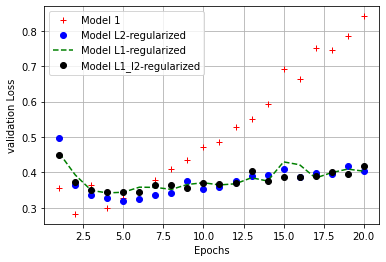

In [ ]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label ='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label ='Model L2-regularized')
plt.plot(epochs, l1_model_val_loss, 'g--', label ='Model L1-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label ='Model L1_l2-regularized')
plt.xlabel('Epochs')
plt.ylabel('validation Loss')
plt.legend()
plt.grid()
plt.show()


4가지 모델 비교
- Original

- L1

- L2

- L1_L2

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [ ]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

In [ ]:
dropput_model = Sequential([Dense(8, activation = 'relu', input_shape=(10000, )),
                            Dropout(0.5),
                         Dense(8, activation = 'relu'),
                         Dropout(0.5),
                         Dense(1, activation = 'sigmoid')])
dropput_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

dropput_model.summary()
plot_model(dropput_model, show_shapes = True)
                    

dropput_model_hist = dropput_model.fit(x_train, y_train, 
                             epochs =20,
                             batch_size = 512,
                             validation_data = (x_test,y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 80008     
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
49/49 [==============================] 

#### 모델 학습

#### 시각화

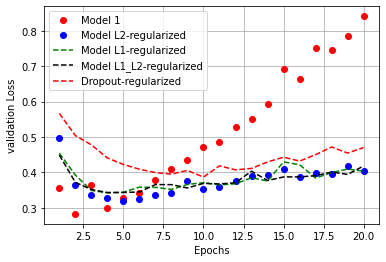

In [ ]:
dropout_model_val_loss = dropput_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'ro', label ='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label ='Model L2-regularized')
plt.plot(epochs, l1_model_val_loss, 'g--', label ='Model L1-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'k--', label ='Model L1_L2-regularized')
plt.plot(epochs, dropout_model_val_loss, 'r--', label ='Dropout-regularized')
plt.xlabel('Epochs')
plt.ylabel('validation Loss')
plt.legend()
plt.grid()
plt.show()
